# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [4]:
# URL raw file
url = "https://raw.githubusercontent.com/sugengcahyono/Machine_Learning/main/Clustering/hasil_clustering.csv"

# Membaca file CSV dari URL
data = pd.read_csv(url)

data.head()

,Age,Gender,Annual Income,Spending Score,Cluster,PCA1,PCA2
0,30,1,151479,89,1,41736.119459,38.651803
1,58,0,185088,95,1,75345.119524,44.222048
2,62,0,70912,76,0,-38830.880502,25.370909
3,23,1,55460,57,0,-54282.880611,6.915422
4,24,1,153752,76,1,44009.119424,25.728288


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [6]:

# Pisahkan fitur dan label
X = data.drop(columns=["Cluster"])  # Fitur
y = data["Cluster"]  # Label (target)

# Membagi data menjadi training set (80%) dan test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Menghitung jumlah data total
print("Jumlah data total: ", len(X))

# Menghitung jumlah data pada X_train (data latih)
print("Jumlah data latih: ", len(X_train))

# Menghitung jumlah data pada X_test (data uji)
print("Jumlah data uji: ", len(X_test))


Jumlah data total:  15079
Jumlah data latih:  12063
Jumlah data uji:  3016


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [24]:
knn = KNeighborsClassifier().fit(X_train, y_train)

print("Model training selesai.")


Model training selesai.




*  KNeighborsClassifier(): Membuat objek KNN tanpa menentukan parameter lebih lanjut. Biasanya, kita dapat mengatur nilai K dengan parameter n_neighbors, tetapi jika tidak ditentukan, default-nya adalah 5.
*   fit(X_train, y_train): Fungsi ini melatih model KNN menggunakan data latih X_train dan label kelas y_train.
*   Setelah model dilatih, kita dapat menggunakannya untuk membuat prediksi pada data uji dan mengevaluasi kinerjanya.
*   Item daftar





Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Accuracy: 0.9996684350132626
Precision: 0.9996598639455782
Recall: 0.9996744791666666
F1-Score: 0.9996670052307444


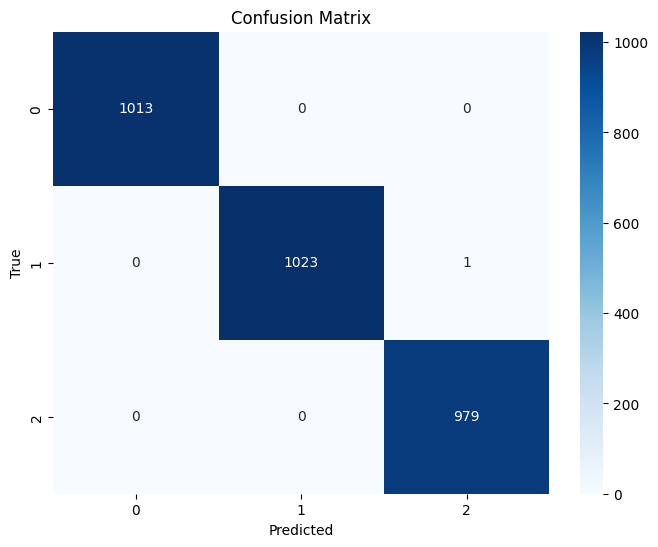

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Prediksi menggunakan data uji
y_pred = knn.predict(X_test)

# Menghitung metrik evaluasi untuk multikelas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # Ganti 'binary' dengan 'macro'
recall = recall_score(y_test, y_pred, average='macro')  # Ganti 'binary' dengan 'macro'
f1 = f1_score(y_test, y_pred, average='macro')  # Ganti 'binary' dengan 'macro'

# Menampilkan hasil evaluasi
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Menampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Membuat heatmap confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Menampilkan gambar
plt.show()


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.



1.   Precision dan Recall
*   Precision: 0.9997
*   Recall: 0.9997
*   F1-Score: 0.9997
*   Hasil precision, recall, dan F1-Score sangat tinggi di atas 99%. Ini menunjukkan bahwa model sangat baik dalam memprediksi setiap kelas (atau cluster) dan memiliki sedikit kesalahan dalam hal kesalahan prediksi positif atau negatif. Precision dan Recall hampir sama, yang berarti model tidak hanya memprediksi kelas dengan benar, tetapi juga tidak terlalu banyak menghasilkan kesalahan klasifikasi (misalnya, false positives atau false negatives).

2.   Confusion Matrix
*   Kelas 0: 1013 prediksi benar, 0 kesalahan
*   Kelas 1: 1023 prediksi benar, 1 kesalahan (false negative untuk kelas 2)
*   Kelas 2: 979 prediksi benar, 0 kesalahan
*   Tidak ada kesalahan prediksi pada kelas 0 dan 2, tetapi ada sedikit kesalahan prediksi pada kelas 1 (hanya 1 kesalahan, yang berarti model memprediksi kelas 1 sebagai kelas 2 satu kali). Ini menunjukkan bahwa model bekerja sangat baik di semua kelas, dengan hanya sedikit kesalahan.
3.   Overfitting atau Underfitting
*   Dari hasil accuracy, precision, recall, dan F1-Score yang sangat tinggi, dapat disimpulkan bahwa model ini kemungkinan besar mengalami overfitting. Meskipun model menunjukkan kinerja yang sangat baik pada data uji (test set), angka yang sangat tinggi untuk metrik evaluasi (hampir mendekati 1) dapat menunjukkan bahwa model terlalu menyesuaikan diri dengan data pelatihan, dan mungkin tidak akan berfungsi sebaik itu pada data yang benar-benar baru. Biasanya, hal ini terjadi ketika data pelatihan terlalu seragam atau terlalu sedikit.
*   Untuk mengatasi kemungkinan overfitting, Mungkin bisa mencoba untuk mengumpulkan lebih banyak data pelatihan yang lebih beragam untuk memastikan bahwa model dapat belajar dari berbagai variasi data dan tidak hanya mengingat pola-pola tertentu. Mungkin perlu mencoba algoritma lain yang lebih efisien, seperti Random Forest, atau Support Vector Machine (SVM), yang sering memberikan hasil yang lebih baik dengan waktu komputasi yang lebih efisien pada dataset besar.








